In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('./listings.csv')

In [28]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Checking dataframe columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

## Getting the ID and neighbourhood

The ID refence the hostes id

In [30]:
reviews = df[['neighbourhood', 'number_of_reviews']]

In [31]:
reviews.head()

,neighbourhood,number_of_reviews
0,Queen Anne,207
1,Queen Anne,43
2,Queen Anne,20
3,Queen Anne,0
4,Queen Anne,38


## Adding up the number of reviews by neighborhood

In [32]:
neib_rev = reviews.groupby('neighbourhood').sum().sort_values(by='number_of_reviews', ascending=False)

In [33]:
neib_rev

,number_of_reviews
neighbourhood,
Capitol Hill,8703
Ballard,7110
Minor,4948
Queen Anne,4506
Belltown,4332
...,...
South Park,15
Pinehurst,9
Roxhill,2


## Getting only neghbourhood with 1000 or above reviews.

In [39]:
neib_rev[neib_rev['number_of_reviews']>=1000]

,number_of_reviews
neighbourhood,
Capitol Hill,8703
Ballard,7110
Minor,4948
Queen Anne,4506
Belltown,4332
Fremont,4005
Wallingford,3782
North Beacon Hill,2852
First Hill,2464


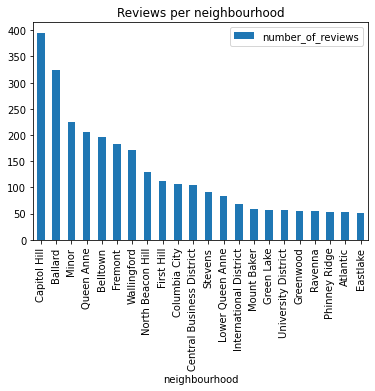

In [36]:
neib_rev = neib_rev[neib_rev['number_of_reviews']>=1000]

(neib_rev/neib_rev.shape[0]).plot(kind="bar");
plt.title("Reviews per neighbourhood");